### Click on sections below to see my response for each exercise

[Exercise 1 - Data Exploration and Transformation](#part-1)

[Exercise 2 - Creating the Database with SQLite](#part-2)

[Exercise 3 - Populating Databases and Manipulating](#part-3)

[Exercise 4 - Retrieving and Visualising Data](#part-4)


In [ ]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Part 1

In [ ]:
#assigning each dataset (csv) with a df to open
#CUSTOMER TABLE
customers_df = pd.read_csv("/content/drive/MyDrive/Coursework-2/customers.csv")
customers_df.dtypes

,0
customer_id,int64
first_name,object
last_name,object
phone,object
email,object
street,object
city,object
state,object


In [ ]:
#checking to see if there are any null values within each column in the df
for column in customers_df.columns:
    print (f"{column} has nulls:", customers_df[column].isnull().any())

customer_id has nulls: False
first_name has nulls: False
last_name has nulls: False
phone has nulls: True
email has nulls: False
street has nulls: False
city has nulls: False
state has nulls: False


In [ ]:
#ORDERS
orders_df = pd.read_csv("/content/drive/MyDrive/Coursework-2/orders.csv")
orders_df.dtypes

,0
order_id,int64
customer_id,int64
order_date,object
store_id,int64


In [ ]:
#checking to see if there are any null values within each column in the df
for column in orders_df.columns:
    print (f"{column} has nulls:", orders_df[column].isnull().any())

order_id has nulls: False
customer_id has nulls: False
order_date has nulls: False
store_id has nulls: False


In [ ]:
#ORDERS ITEMS
ordersitems_df = pd.read_csv("/content/drive/MyDrive/Coursework-2/order_items.csv")
ordersitems_df.dtypes

,0
item_id,int64
order_id,int64
product_id,int64
quantity,int64
list_price,float64
discount,float64


In [ ]:
#checking to see if there are any null values within each column in the df
for column in ordersitems_df.columns:
    print (f"{column} has nulls:", ordersitems_df[column].isnull().any())

item_id has nulls: False
order_id has nulls: False
product_id has nulls: False
quantity has nulls: False
list_price has nulls: False
discount has nulls: False


In [ ]:
#STORES
stores_df = pd.read_csv("/content/drive/MyDrive/Coursework-2/stores.csv")
stores_df.dtypes

,0
store_id,int64
store_name,object
phone,object
email,object
street,object
city,object
state,object
zip_code,int64


In [ ]:
#checking to see if there are any null values within each column in the df
for column in stores_df.columns:
    print (f"{column} has nulls:", stores_df[column].isnull().any())

store_id has nulls: False
store_name has nulls: False
phone has nulls: False
email has nulls: False
street has nulls: False
city has nulls: False
state has nulls: False
zip_code has nulls: False


In [ ]:
#BRAND
brand_df = pd.read_csv("/content/drive/MyDrive/Coursework-2/brands.csv")
brand_df.dtypes

,0
brand_id,int64
brand_name,object


In [ ]:
#checking to see if there are any null values within each column in the df
for column in brand_df.columns:
    print (f"{column} has nulls:", brand_df[column].isnull().any())

brand_id has nulls: False
brand_name has nulls: False


In [ ]:
#CATEGORIES

categories_df = pd.read_csv("/content/drive/MyDrive/Coursework-2/categories.csv")
categories_df.dtypes

,0
category_id,int64
category_name,object


In [ ]:
#checking to see if there are any null values within each column in the df
for column in categories_df.columns:
    print (f"{column} has nulls:", categories_df[column].isnull().any())

category_id has nulls: False
category_name has nulls: False


In [ ]:
#PRODUCT
product_df = pd.read_csv("/content/drive/MyDrive/Coursework-2/products.csv")
product_df = product_df.rename(columns= {"brand_id": "brand_name", "category_id": "category_name"})
product_df.dtypes

,0
product_id,int64
product_name,object
brand_name,int64
category_name,int64
model_year,int64
list_price,float64


DATA TRANSFORMATION FOR THE PRODUCT DATAFRAME

In [ ]:
#category names were encoded which doesn't allow the key to be passed to category table/df

product_df['category_name'] = product_df['category_name'].replace({
    1: 'Children Bicycles',
    2: 'Comfort Bicycles',
    3: 'Cruisers Bicycles',
    4: 'Cyclocross Bicycles',
    5: 'Electric Bikes',
    6: 'Mountain Bikes',
    7: 'Road Bikes'
})

In [ ]:
#brand names were encoded which doesn't allow the key to be passed to category table/df

product_df['brand_name'] = product_df['brand_name'].replace({
    1: 'Electra',
    2: 'Haro',
    3: 'Heller',
    4: 'Pure Cycles',
    5: 'Ritchey',
    6: 'Strider',
    7: 'Sun Bicycles',
    8: 'Surly',
    9: 'Trek'
})

In [ ]:
product_df.head(5)

,product_id,product_name,brand_name,category_name,model_year,list_price
0,1,Trek 820 - 2016,Trek,Mountain Bikes,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,Ritchey,Mountain Bikes,2016,749.99
2,3,Surly Wednesday Frameset - 2016,Surly,Mountain Bikes,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,Trek,Mountain Bikes,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,Heller,Mountain Bikes,2016,1320.99


In [ ]:
#checking to see if there are any null values within each column in the df
for column in product_df.columns:
    print (f"{column} has nulls:", product_df[column].isnull().any())

product_id has nulls: False
product_name has nulls: False
brand_name has nulls: False
category_name has nulls: False
model_year has nulls: False
list_price has nulls: False


### Part 2

In [ ]:
#defining the sqlite db // creating it
conn = sqlite3.connect('e-commerce.db')

In [ ]:
#defining a cursor to interact with the database
cursor = conn.cursor()

In [ ]:
#customer table

cursor.execute('''
CREATE TABLE IF NOT EXISTS customers (
  customer_id INTEGER PRIMARY KEY,
  first_name TEXT NOT NULL,
  last_name TEXT NOT NULL,
  phone TEXT,
  email TEXT UNIQUE NOT NULL,
  street TEXT NOT NULL,
  city TEXT NOT NULL,
  state TEXT NOT NULL
)
''')

In [ ]:
#stores table

cursor.execute('''
CREATE TABLE IF NOT EXISTS stores (
  store_id INTEGER PRIMARY KEY,
  store_name TEXT NOT NULL,
  phone TEXT UNIQUE NOT NULL,
  email TEXT UNIQUE NOT NULL,
  street TEXT NOT NULL,
  city TEXT NOT NULL,
  state TEXT NOT NULL,
  zip_code INTEGER NOT NULL
)
''')

In [ ]:
#orders table

cursor.execute('''
CREATE TABLE IF NOT EXISTS orders (
  order_id INTEGER PRIMARY KEY,
  customer_id INTEGER NOT NULL,
  order_date TEXT NOT NULL,
  store_id INTEGER NOT NULL,
  FOREIGN KEY (store_id) REFERENCES Stores (store_id),
  FOREIGN KEY (customer_id) REFERENCES Customers (customer_id)
)
''')

In [ ]:
#category table

cursor.execute('''
CREATE TABLE IF NOT EXISTS category (
  category_name TEXT PRIMARY KEY,
  category_id INTEGER NOT NULL
)
''')

In [ ]:
#brand table

cursor.execute('''
CREATE TABLE IF NOT EXISTS brand (
  brand_name TEXT PRIMARY KEY,
  brand_id INTEGER NOT NULL
)
''')

In [ ]:
#products table

cursor.execute('''
CREATE TABLE IF NOT EXISTS products (
  product_id INTEGER PRIMARY KEY,
  product_name TEXT NOT NULL,
  brand_name INTEGER NOT NULL,
  category_name INTEGER NOT NULL,
  model_year NOT NULL,
  list_price FLOAT NOT NULL,
  FOREIGN KEY (brand_name) REFERENCES Brand (brand_name),
  FOREIGN KEY (category_name) REFERENCES Category (category_name)
)
''')

In [ ]:
#orders items table

cursor.execute('''
CREATE TABLE IF NOT EXISTS order_items (
  item_id INTEGER NOT NULL,
  order_id INTEGER NOT NULL,
  product_id INTEGER NOT NULL,
  quantity INTEGER NOT NULL,
  list_price FLOAT NOT NULL,
  discount FLOAT NOT NULL,
  PRIMARY KEY (item_id, order_id),
  FOREIGN KEY (order_id) REFERENCES Orders (order_id),
  FOREIGN KEY (product_id) REFERENCES Products (product_id)
  )
''')

In [ ]:
#dropping the product table to alter the table with new column

cursor.execute('DROP TABLE IF EXISTS products')

In [ ]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS products (
  product_id INTEGER PRIMARY KEY,
  product_name TEXT NOT NULL,
  brand_name INTEGER NOT NULL,
  category_name INTEGER NOT NULL,
  model_year NOT NULL,
  list_price FLOAT NOT NULL,
  FOREIGN KEY (brand_name) REFERENCES Brand (brand_name),
  FOREIGN KEY (category_name) REFERENCES Category (category_name)
  FOREIGN KEY (list_price) REFERENCES Order_items (list_price)
)
''')

### Part 3

In [ ]:
#Customer Table - populating with the csv file
data_path = '/content/drive/MyDrive/Coursework-2/customers.csv'
with open(data_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    cursor.executemany('''
    INSERT OR IGNORE INTO customers (customer_id, first_name, last_name, phone, email, street, city, state)
    VALUES (:customer_id, :first_name, :last_name, :phone, :email, :street, :city, :state)
    ''', reader)
#commit changes
conn.commit()
print("The data has been filled in successfully")

The data has been filled in successfully


In [ ]:
#Stores Table - populating with the csv file
data_path = '/content/drive/MyDrive/Coursework-2/stores.csv'
with open(data_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    cursor.executemany('''
    INSERT OR IGNORE INTO stores (store_id, store_name, phone, email, street, city, state, zip_code)
    VALUES (:store_id, :store_name, :phone, :email, :street, :city, :state, :zip_code)
    ''', reader)
#commit changes
conn.commit()
print("The data has been filled in successfully")

The data has been filled in successfully


In [ ]:
#Order Table - populating with the csv file
data_path = '/content/drive/MyDrive/Coursework-2/orders.csv'
with open(data_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    cursor.executemany('''
    INSERT OR IGNORE INTO orders (order_id, order_date, store_id, customer_id)
    VALUES (:order_id, :order_date, :store_id, :customer_id)
    ''', reader)
#commit changes
conn.commit()
print("The data has been filled in successfully")

The data has been filled in successfully


In [ ]:
#Order Items Table - populating with the csv file
data_path = '/content/drive/MyDrive/Coursework-2/order_items.csv'
with open(data_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    cursor.executemany('''
    INSERT OR IGNORE INTO order_items (item_id, order_id, product_id, quantity, list_price, discount)
    VALUES (:item_id, :order_id, :product_id, :quantity, :list_price, :discount)
    ''', reader)
#commit changes
conn.commit()
print("The data has been filled in successfully")

The data has been filled in successfully


In [ ]:
#Brand Table - populating with the csv file
data_path = '/content/drive/MyDrive/Coursework-2/brands.csv'
with open(data_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    cursor.executemany('''
    INSERT OR IGNORE INTO brand (brand_name, brand_id)
    VALUES (:brand_name, :brand_id)
    ''', reader)
#commit changes
conn.commit()
print("The data has been filled in successfully")

The data has been filled in successfully


In [ ]:
#Categories Table - populating with the csv file
data_path = '/content/drive/MyDrive/Coursework-2/categories.csv'
with open(data_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    cursor.executemany('''
    INSERT OR IGNORE INTO category (category_name, category_id)
    VALUES (:category_name, :category_id)
    ''', reader)
#commit changes
conn.commit()
print("The data has been filled in successfully")

The data has been filled in successfully


In [ ]:
#converting the modified df for product back to a csv so we can populate the table with data

file_path = '/content/drive/MyDrive/Coursework-2/products1.csv'
product_df.to_csv(file_path, index=False)
print(f"DataFrame saved to {file_path}")

DataFrame saved to /content/drive/MyDrive/Coursework-2/products1.csv


In [ ]:
#Products Table - populating with the csv file
data_path = '/content/drive/MyDrive/Coursework-2/products1.csv'
with open(data_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    cursor.executemany('''
    INSERT OR IGNORE INTO products (product_id, product_name, brand_name, category_name, model_year, list_price)
    VALUES (:product_id, :product_name,:brand_name, :category_name, :model_year, :list_price)
    ''', reader)

#commit changes
conn.commit()
print("The data has been filled in successfully")

The data has been filled in successfully


In [ ]:
#checking the data has been filled right: customers

cursor.execute('SELECT * FROM customers LIMIT 5')

#fetching results
rows = cursor.fetchall()

#displaying rows
for row in rows:
    print(row)

(1, 'Debra', 'Burks', 'NULL', 'debra.burks@yahoo.com', '9273 Thorne Ave. ', 'Orchard Park', 'NY')
(2, 'Kasha', 'Todd', 'NULL', 'kasha.todd@yahoo.com', '910 Vine Street ', 'Campbell', 'CA')
(3, 'Tameka', 'Fisher', 'NULL', 'tameka.fisher@aol.com', '769C Honey Creek St. ', 'Redondo Beach', 'CA')
(4, 'Daryl', 'Spence', 'NULL', 'daryl.spence@aol.com', '988 Pearl Lane ', 'Uniondale', 'NY')
(5, 'Charolette', 'Rice', '(916) 381-6003', 'charolette.rice@msn.com', '107 River Dr. ', 'Sacramento', 'CA')


In [ ]:
customers_df.head(5)

,customer_id,first_name,last_name,phone,email,street,city,state
0,1,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY
1,2,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA
2,3,Tameka,Fisher,NaN,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA
3,4,Daryl,Spence,NaN,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA


In [ ]:
#checking the data has been filled right: orders

cursor.execute('SELECT * FROM orders LIMIT 5')

#fetching results
rows = cursor.fetchall()

#displaying rows
for row in rows:
    print(row)

(1, 259, '01/01/2016', 1)
(2, 1212, '01/01/2016', 2)
(3, 523, '02/01/2016', 2)
(4, 175, '03/01/2016', 1)
(5, 1324, '03/01/2016', 2)


In [ ]:
orders_df.head(5)

,order_id,customer_id,order_date,store_id
0,1,259,01/01/2016,1
1,2,1212,01/01/2016,2
2,3,523,02/01/2016,2
3,4,175,03/01/2016,1
4,5,1324,03/01/2016,2


In [ ]:
#checking the data has been filled right: orders items

cursor.execute('SELECT * FROM order_items LIMIT 5')

#fetching results
rows = cursor.fetchall()

#displaying rows
for row in rows:
    print(row)

(1, 1, 20, 1, 599.99, 0.2)
(2, 1, 8, 2, 1799.99, 0.07)
(3, 1, 10, 2, 1549.0, 0.05)
(4, 1, 16, 2, 599.99, 0.05)
(5, 1, 4, 1, 2899.99, 0.2)


In [ ]:
#output for the df and sql table is different due to the column's constraints

ordersitems_df.head(5)

,item_id,order_id,product_id,quantity,list_price,discount
0,1,1,20,1,599.99,0.20
1,2,1,8,2,1799.99,0.07
2,3,1,10,2,1549.00,0.05
3,4,1,16,2,599.99,0.05
4,5,1,4,1,2899.99,0.20


In [ ]:
#checking the data has been filled right: stores

cursor.execute('SELECT * FROM stores LIMIT 5')

#fetching results
rows = cursor.fetchall()

#displaying rows
for row in rows:
    print(row)

(1, 'Santa Cruz Bikes', '(831) 476-4321', 'santacruz@bikes.shop', '3700 Portola Drive', 'Santa Cruz', 'CA', 95060)
(2, 'Baldwin Bikes', '(516) 379-8888', 'baldwin@bikes.shop', '4200 Chestnut Lane', 'Baldwin', 'NY', 11432)
(3, 'Rowlett Bikes', '(972) 530-5555', 'rowlett@bikes.shop', '8000 Fairway Avenue', 'Rowlett', 'TX', 75088)


In [ ]:
stores_df.head(5)

,store_id,store_name,phone,email,street,city,state,zip_code
0,1,Santa Cruz Bikes,(831) 476-4321,santacruz@bikes.shop,3700 Portola Drive,Santa Cruz,CA,95060
1,2,Baldwin Bikes,(516) 379-8888,baldwin@bikes.shop,4200 Chestnut Lane,Baldwin,NY,11432
2,3,Rowlett Bikes,(972) 530-5555,rowlett@bikes.shop,8000 Fairway Avenue,Rowlett,TX,75088


In [ ]:
#checking the data has been filled right: brand

cursor.execute('SELECT * FROM brand LIMIT 5')

#fetching results
rows = cursor.fetchall()

#displaying rows
for row in rows:
    print(row)

('Electra', 1)
('Haro', 2)
('Heller', 3)
('Pure Cycles', 4)
('Ritchey', 5)


In [ ]:
brand_df.head(5)

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey


In [ ]:
#checking the data has been filled right: categories

cursor.execute('SELECT * FROM category LIMIT 5')

#fetching results
rows = cursor.fetchall()

#displaying rows
for row in rows:
    print(row)

('Children Bicycles', 1)
('Comfort Bicycles', 2)
('Cruisers Bicycles', 3)
('Cyclocross Bicycles', 4)
('Electric Bikes', 5)


In [ ]:
categories_df.head(5)

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes


In [ ]:
#checking the data has been filled right: products

cursor.execute('SELECT * FROM products LIMIT 5')

#fetching results
rows = cursor.fetchall()

#displaying rows
for row in rows:
    print(row)

(1, 'Trek 820 - 2016', 'Trek', 'Mountain Bikes', '2016', 379.99)
(2, 'Ritchey Timberwolf Frameset - 2016', 'Ritchey', 'Mountain Bikes', '2016', 749.99)
(3, 'Surly Wednesday Frameset - 2016', 'Surly', 'Mountain Bikes', '2016', 999.99)
(4, 'Trek Fuel EX 8 29 - 2016', 'Trek', 'Mountain Bikes', '2016', 2899.99)
(5, 'Heller Shagamaw Frame - 2016', 'Heller', 'Mountain Bikes', '2016', 1320.99)


In [ ]:
product_df.head(5)

,product_id,product_name,brand_name,category_name,model_year,list_price
0,1,Trek 820 - 2016,Trek,Mountain Bikes,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,Ritchey,Mountain Bikes,2016,749.99
2,3,Surly Wednesday Frameset - 2016,Surly,Mountain Bikes,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,Trek,Mountain Bikes,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,Heller,Mountain Bikes,2016,1320.99


### Part 4

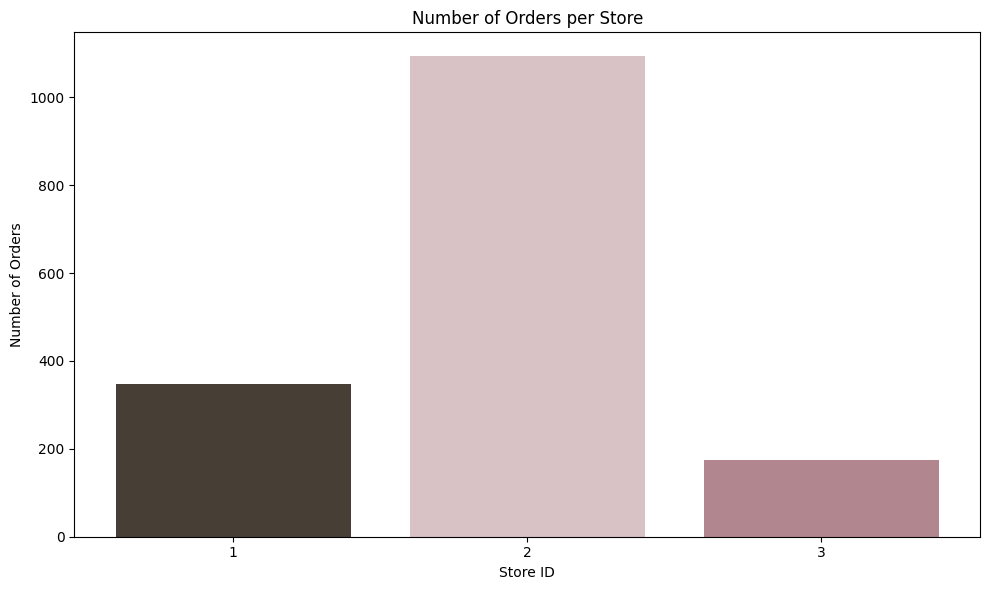

In [ ]:
#create a visual to compare the num of orders per store

#sql query which counts the num of orders by store
query = '''
SELECT store_id, COUNT(order_id) AS order_count
FROM orders
GROUP BY store_id
ORDER BY order_count DESC
'''
#store sql data in df
df1 = pd.read_sql_query(query, conn)

#colour scheme for the bar chart
colours = ['#d8c2c6', '#473e36', '#b2868e']

plt.figure(figsize=(10, 6))
plt.bar(df1['store_id'], df1['order_count'], color=colours)

#setting x-axis labels to integers only
plt.xticks(ticks=df1['store_id'], labels=df1['store_id'].astype(int))
plt.xlabel('Store ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Store')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

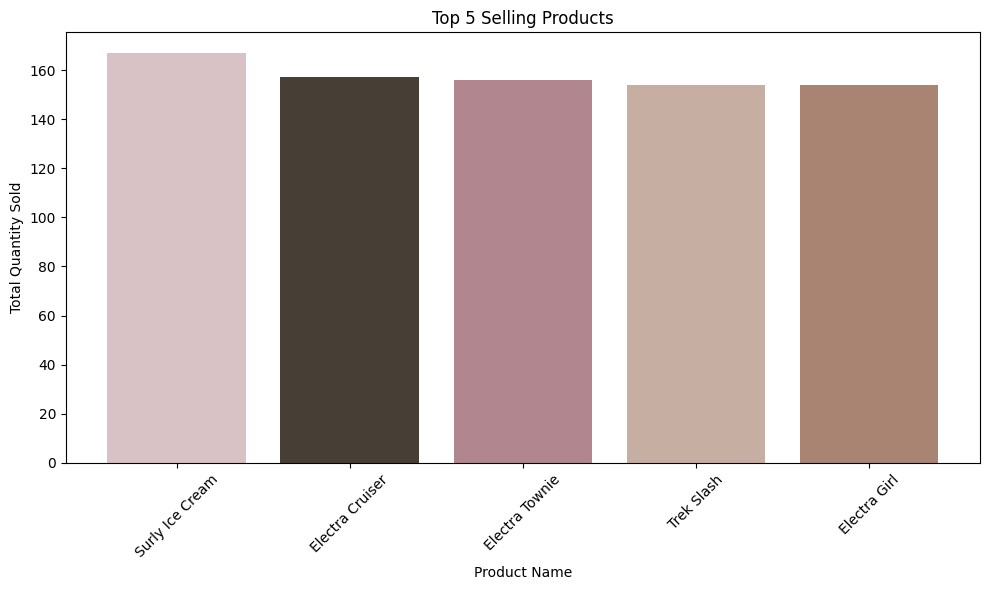

In [ ]:
#create a visual to compare the top 5 best selling products

#sql query to get the 5 top selling products

query = '''
SELECT p.product_id, p.product_name, SUM(o.quantity) AS total_sold
FROM products p
JOIN order_items o ON p.product_id = o.product_id
GROUP BY p.product_id, p.product_name
ORDER BY total_sold DESC
LIMIT 5
'''

#stores data in df
df2 = pd.read_sql_query(query, conn)

#product names are too long to plot, so assigning relevant abbreviations
abbreviations = {
    'Surly Ice Cream Truck Frameset - 2016': 'Surly Ice Cream',
    'Electra Cruiser 1 (24-Inch) - 2016': 'Electra Cruiser',
    'Electra Townie Original 7D EQ - 2016': 'Electra Townie',
    'Trek Slash 8 27.5 - 2016': 'Trek Slash',
    "Electra Girl's Hawaii 1 (20-inch) - 2015/2016" : 'Electra Girl'
}

#apply the dict mapping
df2['product_name'] = df2['product_name'].replace(abbreviations)


#plotting the data
plt.figure(figsize=(10, 6))
plt.bar(df2['product_name'], df2['total_sold'], color=['#d8c2c6', '#473e36', '#b2868e', '#c7aea2', '#aa8472'])

#graph labels
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.title('Top 5 Selling Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
